# Create Roughness Metric CSVs Using Clustering from Standard Deviations

## Set-up

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
window = 1000    # number of ms ahead

## Helper functions

In [4]:
# Difference in ms between t1 and t2
# Negative if s1 is before s2, positive if s2 is before s1
def findDifferenceMs(t1_tup, t2_tup):
  s1, ms1 = t1_tup
  s2, ms2 = t2_tup
  if (s1 > s2):
      return (s1-s2-1)*1000 + (1000-ms2) + ms1
  elif (s1 < s2):
      return -((s2-s1-1)*1000 + (1000-ms1) + ms2)
  else:
      return ms1-ms2

In [5]:
# Find the bounding indices for window ms ahead of the current index (df[index:max_index])
def time_window(r_metric, index, window):
  t1_tup = r_metric['time_tuples'].iloc[index]
  
  max_index = index
  max_time = t1_tup

  while abs(findDifferenceMs(max_time, t1_tup)) <= window and max_index < len(r_metric) - 1:
    max_index += 1
    max_time = r_metric['time_tuples'].iloc[max_index]
  
  return index, max_index

In [6]:
# Given a DataFrame with z-axis acceleration, create new columns with the z-axis acceleration
# readings window ms ahead of the current timestamp and their standard deviations.
def add_roughness_metric(r_metric):
  near_vals = []
  vals = r_metric['az'].to_numpy()

  for i in range(0, len(r_metric)):
    if i % 10000 == 0:
      print(i, "/", len(r_metric))

    min_index, max_index = time_window(r_metric, i, window)
    near_vals.append(vals[min_index:max_index])

  r_metric['near_vals'] = near_vals
  r_metric['near_val_std'] = [np.std(np.array(x)) for x in r_metric.near_vals.values]

  return r_metric

In [7]:
# Plot the roughness metric and the z-axis acceleration readings for a given range of data.
def plot_metric(min_index, max_index, r_metric, column_name):
  filtered=r_metric[min_index:max_index]
  times = filtered['utc_s']
  times += (filtered['utc_ms'] / 1000.)

  az, = plt.plot(times, filtered['az'])
  met, = plt.plot(times, filtered[column_name])
  plt.legend([az, met], ['az', column_name])
  plt.title(column_name)
  plt.show()

## Create a CSV with all the standard deviations.

In [ ]:
# get all the accelerometer and gps csvs
filepath = '/gdrive/My Drive/Labeling/SensorData/Virb'

all_r_metric = pd.DataFrame(columns=['utc_s', 'utc_ms', 'z_accel (m/s^2)', 'near_val_std'])

for root, dirs, files in os.walk(filepath):
  for f in files:
    if f == 'accelerometer_calibrated_split.csv':

      print("Creating roughness data for", os.path.split(root)[1])

      acc_csv = os.path.join(root, f)
      acc_df = pd.read_csv(acc_csv)
      r_metric = pd.DataFrame()
      r_metric['utc_s'] = acc_df['utc_s (s)']
      r_metric['utc_ms'] = acc_df['utc_ms (ms)']
      r_metric['time_tuples'] = list(zip(r_metric['utc_s'], r_metric['utc_ms']))
      r_metric['az'] = acc_df['calibrated_accel_z (m/s^2)']

      r_metric = add_roughness_metric(r_metric)

      r_metric_csv = pd.DataFrame()
      r_metric_csv['utc_s'] = r_metric['utc_s']
      r_metric_csv['utc_ms'] = r_metric['utc_ms']
      r_metric_csv['z_accel (m/s^2)'] = r_metric['az']
      r_metric_csv['near_val_std'] = r_metric['near_val_std']

      all_r_metric = all_r_metric.append(r_metric_csv)

Creating roughness data for 2020-09-29-09-46-42
0 / 514830
10000 / 514830
20000 / 514830
30000 / 514830
40000 / 514830
50000 / 514830
60000 / 514830
70000 / 514830
80000 / 514830
90000 / 514830
100000 / 514830
110000 / 514830
120000 / 514830
130000 / 514830
140000 / 514830
150000 / 514830
160000 / 514830
170000 / 514830
180000 / 514830
190000 / 514830
200000 / 514830
210000 / 514830
220000 / 514830
230000 / 514830
240000 / 514830
250000 / 514830
260000 / 514830
270000 / 514830
280000 / 514830
290000 / 514830
300000 / 514830
310000 / 514830
320000 / 514830
330000 / 514830
340000 / 514830
350000 / 514830
360000 / 514830
370000 / 514830
380000 / 514830
390000 / 514830
400000 / 514830
410000 / 514830
420000 / 514830
430000 / 514830
440000 / 514830
450000 / 514830
460000 / 514830
470000 / 514830
480000 / 514830
490000 / 514830
500000 / 514830
510000 / 514830


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Creating roughness data for 2020-10-02-10-17-05
0 / 224430
10000 / 224430
20000 / 224430
30000 / 224430
40000 / 224430
50000 / 224430
60000 / 224430
70000 / 224430
80000 / 224430
90000 / 224430
100000 / 224430
110000 / 224430
120000 / 224430
130000 / 224430
140000 / 224430
150000 / 224430
160000 / 224430
170000 / 224430
180000 / 224430
190000 / 224430
200000 / 224430
210000 / 224430
220000 / 224430
Creating roughness data for 2020-09-24-12-07-41
0 / 479400
10000 / 479400
20000 / 479400
30000 / 479400
40000 / 479400
50000 / 479400
60000 / 479400
70000 / 479400
80000 / 479400
90000 / 479400
100000 / 479400
110000 / 479400
120000 / 479400
130000 / 479400
140000 / 479400
150000 / 479400
160000 / 479400
170000 / 479400
180000 / 479400
190000 / 479400
200000 / 479400
210000 / 479400
220000 / 479400
230000 / 479400
240000 / 479400
250000 / 479400
260000 / 479400
270000 / 479400
280000 / 479400
290000 / 479400
300000 / 479400
310000 / 479400
320000 / 479400
330000 / 479400
340000 / 479400
3500

In [ ]:
all_r_metric.head()

,utc_s,utc_ms,z_accel (m/s^2),near_val_std
0,970325257,571,9.720459,0.426955
1,970325257,581,9.844957,0.428064
2,970325257,591,10.050858,0.434898
3,970325257,601,10.160992,0.446394
4,970325257,611,10.079589,0.453506


In [ ]:
all_r_metric.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,z_accel (m/s^2),near_val_std
count,1481190.00,1481185.00
mean,9.67,4.85
std,5.85,3.22
min,-52.03,0.00
25%,7.39,2.60
50%,9.63,4.05
75%,11.91,6.30
max,114.07,24.98


In [ ]:
all_r_metric.to_csv('/gdrive/My Drive/Labeling/SensorData/roughness_stds_1s_ahead.csv', index=False)

## Perform clustering on the standard deviations

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#### Prepare the standard deviation values for clustering

In [ ]:
roughness_csv = pd.read_csv('/gdrive/My Drive/Labeling/SensorData/roughness_stds_1s_ahead.csv', index_col=False)
roughness_csv.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,utc_s,utc_ms,z_accel (m/s^2),near_val_std
count,1481190.00,1481190.00,1481190.00,1481185.00
mean,969582057.99,499.59,9.67,4.85
std,1700148.91,288.66,5.85,3.22
min,964868527.00,0.00,-52.03,0.00
25%,969902820.00,250.00,7.39,2.60
50%,969906573.00,500.00,9.63,4.05
75%,970328993.00,750.00,11.91,6.30
max,970588634.00,999.00,114.07,24.98


In [ ]:
# There is one entry that has near_val_std = NaN
print(roughness_csv['near_val_std'].isnull().sum())
print(roughness_csv[roughness_csv['near_val_std'].isnull()])

5
             utc_s  utc_ms  z_accel (m/s^2)  near_val_std
514829   970330470     856        -1.173159           NaN
739259   970588634     260         9.069236           NaN
1218659  969906586     738         9.279926           NaN
1314029  969832944     630         8.997410           NaN
1481189  964870220     917         9.318233           NaN


In [ ]:
# Temporary fix: Remove that row
roughness_csv = roughness_csv.dropna()

In [ ]:
X = np.array(roughness_csv['near_val_std'])
X = X.reshape(-1, 1)
print(X.shape)

(1481185, 1)


#### Helper functions

In [ ]:
def buckets(cluster_centers):
  ranges = []
  for i in range(len(cluster_centers)):
    if i == 0:
      min = 0
      max = np.average([cluster_centers[i], cluster_centers[i+1]])
    elif i == len(cluster_centers) - 1:
      min = np.average([cluster_centers[i-1], cluster_centers[i]])
      max = '+'
    else:
      min = np.average([cluster_centers[i-1], cluster_centers[i]])
      max = np.average([cluster_centers[i], cluster_centers[i+1]])
    
    ranges.append(min)
    print('Group', i, ':', min, 'to', max)
  
  return ranges

In [ ]:
def num_training_examples(ranges):
  print('Number of training examples in each group')

  ranges.append(float('inf'))
  for i in range(0, len(ranges) - 1):
    filtered = roughness_csv[roughness_csv['near_val_std'] < ranges[i+1]]
    filtered = filtered[filtered['near_val_std'] > ranges[i]]
    print('Group', i, ':', len(filtered))
  
  del ranges[-1]

#### K-means clustering with n = 2

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
centers2 = kmeans.cluster_centers_
print(centers2)

[[3.41192891]
 [9.52819448]]


In [ ]:
centers2 = np.sort(centers2.flatten())
ranges2 = buckets(centers2)

Group 0 : 0 to 6.470061695463736
Group 1 : 6.470061695463736 to +


In [ ]:
print(ranges2)
num_training_examples(ranges2)

[0, 6.470061695463736]
Number of training examples in each group
Group 0 : 1130475
Group 1 : 350694


#### K-means clustering with n = 3

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centers3 = kmeans.cluster_centers_
print(centers3)

[[ 2.67480822]
 [11.8113016 ]
 [ 6.20721288]]


In [ ]:
centers3 = np.sort(centers3.flatten())
ranges3 = buckets(centers3)

Group 0 : 0 to 4.441010549582302
Group 1 : 4.441010549582302 to 9.009257238203732
Group 2 : 9.009257238203732 to +


In [ ]:
print(ranges3)
num_training_examples(ranges3)

[0, 4.441010549582302, 9.009257238203732]
Number of training examples in each group
Group 0 : 820648
Group 1 : 500053
Group 2 : 160468


#### K-means clustering with n = 4

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
centers4 = kmeans.cluster_centers_
print(centers4)

[[ 2.31128848]
 [ 8.50869566]
 [ 4.99476805]
 [13.71584044]]


In [ ]:
centers4 = np.sort(centers4.flatten())
ranges4 = buckets(centers4)

Group 0 : 0 to 3.653028263516041
Group 1 : 3.653028263516041 to 6.751731854095951
Group 2 : 6.751731854095951 to 11.112268050741953
Group 3 : 11.112268050741953 to +


In [ ]:
print(ranges4)
num_training_examples(ranges4)

[0, 3.653028263516041, 6.751731854095951, 11.112268050741953]
Number of training examples in each group
Group 0 : 647887
Group 1 : 512772
Group 2 : 240821
Group 3 : 79689


## Create CSVs with roughness metrics from clustering results

#### Roughness groups

In [8]:
# K-means clustering with k = 2
# Group 0 : 0 to 6.470061695463736
# Group 1 : 6.470061695463736 to +
def group_clusters_2(x):
  if x < 6.470061695463736:
    return 0
  else:
    return 1

# K-means clustering with k = 3
# Group 0 : 0 to 4.441010549582302
# Group 1 : 4.441010549582302 to 9.009257238203732
# Group 2 : 9.009257238203732 to +
def group_clusters_3(x):
  if x < 4.441010549582302:
    return 0
  elif x < 9.009257238203732:
    return 1
  else:
    return 2

# K-means clustering with k = 4
# Group 0 : 0 to 3.653028263516041
# Group 1 : 3.653028263516041 to 6.751731854095951
# Group 2 : 6.751731854095951 to 11.112268050741953
# Group 3 : 11.112268050741953 to +
def group_clusters_4(x):
  if x < 3.653028263516041:
    return 0
  elif x < 6.751731854095951:
    return 1
  elif x < 11.112268050741953:
    return 2
  else:
    return 3

def group_original(x):
  if x < 2.5:
    return 0
  elif x < 5:
    return 1
  elif x < 7.5:
    return 2
  else:
    return 3

#### Add roughness metrics

In [9]:
def add_roughness_metric_k_means(r_metric):
  near_vals = []
  vals = r_metric['az'].to_numpy()

  for i in range(0, len(r_metric)):
    if i % 10000 == 0:
      print(i, "/", len(r_metric))

    min_index, max_index = time_window(r_metric, i, window)
    near_vals.append(vals[min_index:max_index])

  r_metric['near_vals'] = near_vals
  r_metric['near_val_std'] = [np.std(np.array(x)) for x in r_metric.near_vals.values]
  r_metric['group2'] = r_metric['near_val_std'].apply(group_clusters_2)
  r_metric['group3'] = r_metric['near_val_std'].apply(group_clusters_3)
  r_metric['group4'] = r_metric['near_val_std'].apply(group_clusters_4)
  r_metric['group_original'] = r_metric['near_val_std'].apply(group_original)

  print(r_metric['near_val_std'].describe())
  print(r_metric['group2'].describe())
  print(r_metric['group3'].describe())
  print(r_metric['group4'].describe())
  print(r_metric['group_original'].describe())

  return r_metric

Creating roughness data for 2020-09-29-09-46-42
0 / 514830
10000 / 514830
20000 / 514830
30000 / 514830
40000 / 514830
50000 / 514830
60000 / 514830
70000 / 514830
80000 / 514830
90000 / 514830
100000 / 514830
110000 / 514830
120000 / 514830
130000 / 514830
140000 / 514830
150000 / 514830
160000 / 514830
170000 / 514830
180000 / 514830
190000 / 514830
200000 / 514830
210000 / 514830
220000 / 514830
230000 / 514830
240000 / 514830
250000 / 514830
260000 / 514830
270000 / 514830
280000 / 514830
290000 / 514830
300000 / 514830
310000 / 514830
320000 / 514830
330000 / 514830
340000 / 514830
350000 / 514830
360000 / 514830
370000 / 514830
380000 / 514830
390000 / 514830
400000 / 514830
410000 / 514830
420000 / 514830
430000 / 514830
440000 / 514830
450000 / 514830
460000 / 514830
470000 / 514830
480000 / 514830
490000 / 514830
500000 / 514830
510000 / 514830


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


count    514829.000000
mean          4.653869
std           3.172368
min           0.000000
25%           2.457590
50%           3.822268
75%           6.056425
max          23.042198
Name: near_val_std, dtype: float64
count    514830.000000
mean          0.218686
std           0.413355
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: group2, dtype: float64
count    514830.000000
mean          0.511159
std           0.668358
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: group3, dtype: float64
count    514830.000000
mean          0.775590
std           0.878695
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: group4, dtype: float64
count    514830.000000
mean          1.247010
std           1.008271
min           0.000000
25%           0.000000
50%           1.000000
75% 

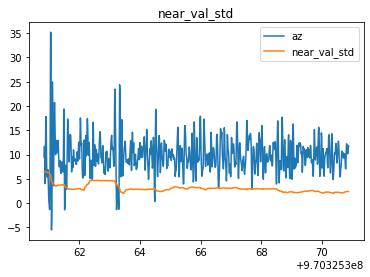

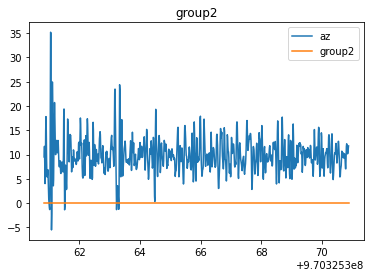

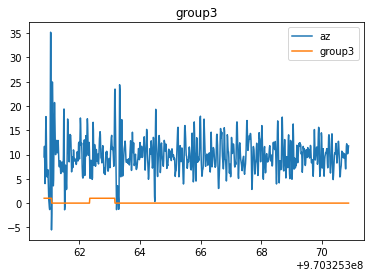

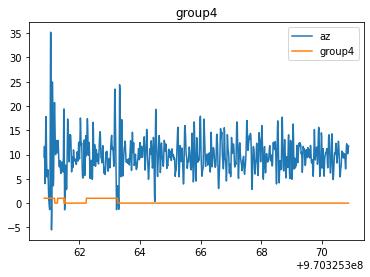

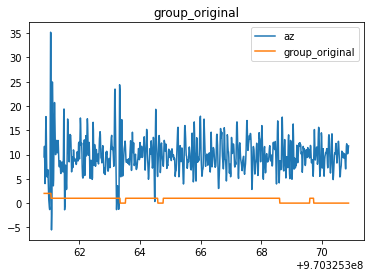

Creating roughness data for 2020-10-02-10-17-05
0 / 224430
10000 / 224430
20000 / 224430
30000 / 224430
40000 / 224430
50000 / 224430
60000 / 224430
70000 / 224430
80000 / 224430
90000 / 224430
100000 / 224430
110000 / 224430
120000 / 224430
130000 / 224430
140000 / 224430
150000 / 224430
160000 / 224430
170000 / 224430
180000 / 224430
190000 / 224430
200000 / 224430
210000 / 224430
220000 / 224430


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


count    224429.000000
mean          5.020880
std           3.192263
min           0.000000
25%           2.723607
50%           4.132425
75%           6.519004
max          20.394534
Name: near_val_std, dtype: float64
count    224430.000000
mean          0.253803
std           0.435187
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: group2, dtype: float64
count    224430.000000
mean          0.575676
std           0.692043
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: group3, dtype: float64
count    224430.000000
mean          0.870240
std           0.905793
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: group4, dtype: float64
count    224430.000000
mean          1.373778
std           1.007190
min           0.000000
25%           1.000000
50%           1.000000
75% 

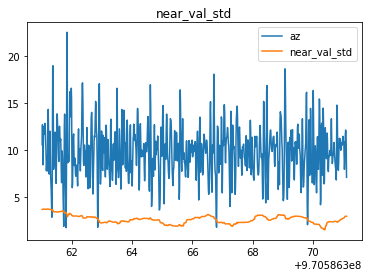

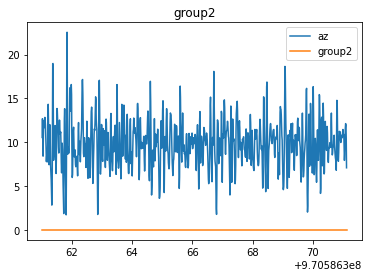

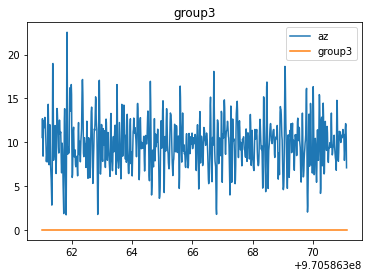

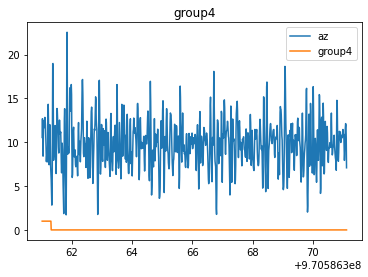

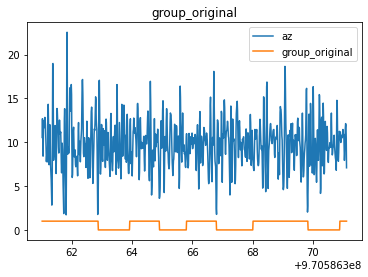

Creating roughness data for 2020-09-24-12-07-41
0 / 479400
10000 / 479400
20000 / 479400
30000 / 479400
40000 / 479400
50000 / 479400
60000 / 479400
70000 / 479400
80000 / 479400
90000 / 479400
100000 / 479400
110000 / 479400
120000 / 479400
130000 / 479400
140000 / 479400
150000 / 479400
160000 / 479400
170000 / 479400
180000 / 479400
190000 / 479400
200000 / 479400
210000 / 479400
220000 / 479400
230000 / 479400
240000 / 479400
250000 / 479400
260000 / 479400
270000 / 479400
280000 / 479400
290000 / 479400
300000 / 479400
310000 / 479400
320000 / 479400
330000 / 479400
340000 / 479400
350000 / 479400
360000 / 479400
370000 / 479400
380000 / 479400
390000 / 479400
400000 / 479400
410000 / 479400
420000 / 479400
430000 / 479400
440000 / 479400
450000 / 479400
460000 / 479400
470000 / 479400


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


count    479399.000000
mean          4.643640
std           2.951312
min           0.000000
25%           2.602570
50%           3.994023
75%           5.931568
max          24.163695
Name: near_val_std, dtype: float64
count    479400.000000
mean          0.204985
std           0.403691
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: group2, dtype: float64
count    479400.000000
mean          0.517259
std           0.649543
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: group3, dtype: float64
count    479400.000000
mean          0.780793
std           0.834461
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: group4, dtype: float64
count    479400.000000
mean          1.266831
std           0.972973
min           0.000000
25%           1.000000
50%           1.000000
75% 

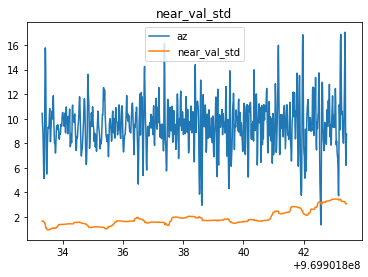

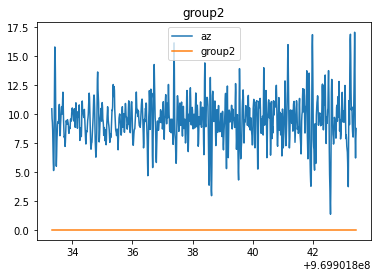

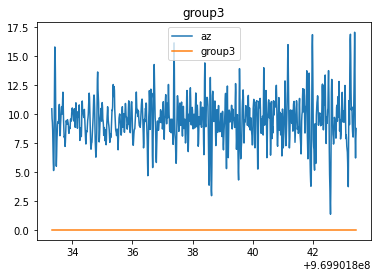

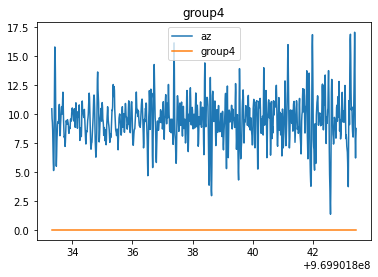

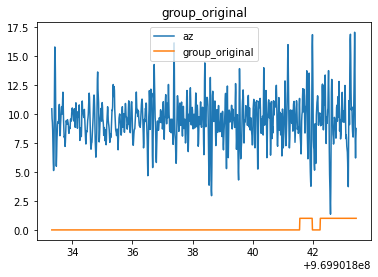

Creating roughness data for 2020-09-23-16-10-10
0 / 95370
10000 / 95370
20000 / 95370
30000 / 95370
40000 / 95370
50000 / 95370
60000 / 95370
70000 / 95370
80000 / 95370
90000 / 95370


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


count    95369.000000
mean         5.094840
std          3.942703
min          0.000000
25%          2.077267
50%          4.014160
75%          7.707911
max         20.672837
Name: near_val_std, dtype: float64
count    95370.000000
mean         0.322250
std          0.467341
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: group2, dtype: float64
count    95370.000000
mean         0.642382
std          0.765608
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: group3, dtype: float64
count    95370.000000
mean         0.925197
std          1.010832
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: group4, dtype: float64
count    95370.000000
mean         1.360868
std          1.179291
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          3.00000

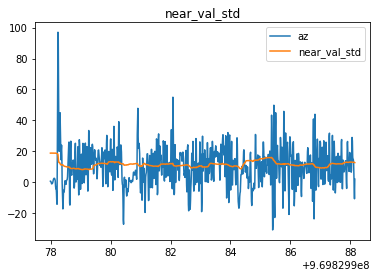

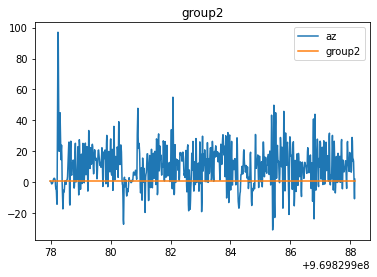

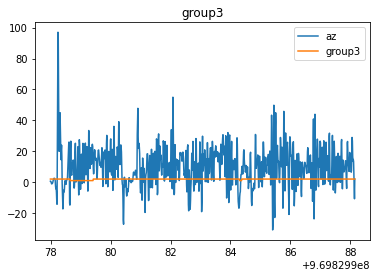

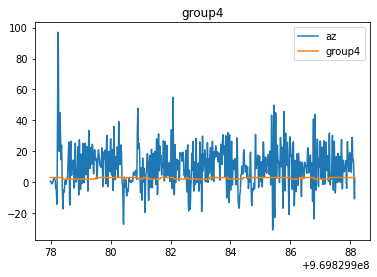

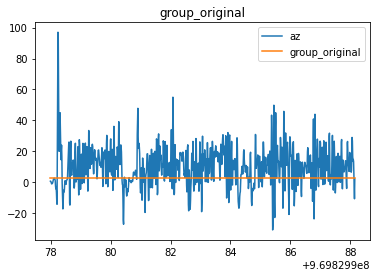

Creating roughness data for 2020-07-28-06-01-11
0 / 167160
10000 / 167160
20000 / 167160
30000 / 167160
40000 / 167160
50000 / 167160
60000 / 167160
70000 / 167160
80000 / 167160
90000 / 167160
100000 / 167160
110000 / 167160
120000 / 167160
130000 / 167160
140000 / 167160
150000 / 167160
160000 / 167160


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


count    167159.000000
mean          5.706709
std           3.487301
min           0.000000
25%           3.298674
50%           4.870637
75%           7.185367
max          24.983908
Name: near_val_std, dtype: float64
count    167160.000000
mean          0.311971
std           0.463299
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: group2, dtype: float64
count    167160.000000
mean          0.714298
std           0.711072
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: group3, dtype: float64
count    167160.000000
mean          1.054935
std           0.917836
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: group4, dtype: float64
count    167160.000000
mean          1.575425
std           0.985022
min           0.000000
25%           1.000000
50%           1.000000
75% 

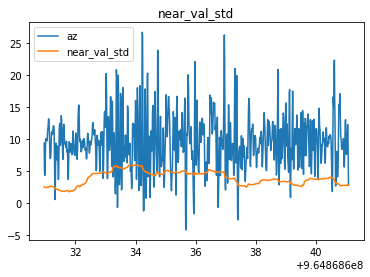

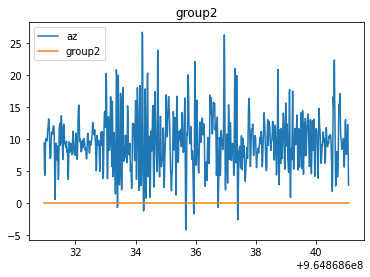

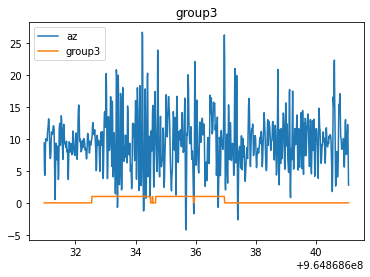

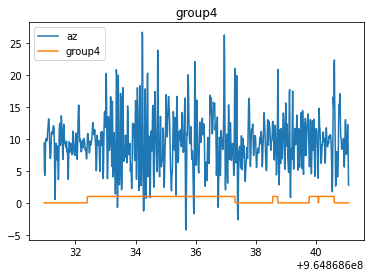

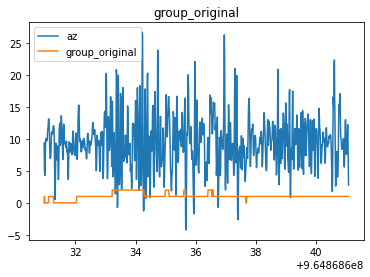

In [10]:
# get all the accelerometer and gps csvs
filepath = '/gdrive/My Drive/Labeling/SensorData/Virb'

for root, dirs, files in os.walk(filepath):
  for f in files:
    if f == 'accelerometer_calibrated_split.csv':

      print("Creating roughness data for", os.path.split(root)[1])

      acc_csv = os.path.join(root, f)
      acc_df = pd.read_csv(acc_csv)
      r_metric = pd.DataFrame()
      r_metric['utc_s'] = acc_df['utc_s (s)']
      r_metric['utc_ms'] = acc_df['utc_ms (ms)']
      r_metric['time_tuples'] = list(zip(r_metric['utc_s'], r_metric['utc_ms']))
      r_metric['az'] = acc_df['calibrated_accel_z (m/s^2)']

      r_metric = add_roughness_metric_k_means(r_metric)
      plot_metric(10200, 11200, r_metric, 'near_val_std')
      plot_metric(10200, 11200, r_metric, 'group2')
      plot_metric(10200, 11200, r_metric, 'group3')
      plot_metric(10200, 11200, r_metric, 'group4')
      plot_metric(10200, 11200, r_metric, 'group_original')

      r_metric_csv = pd.DataFrame()
      r_metric_csv['utc_s'] = r_metric['utc_s']
      r_metric_csv['utc_ms'] = r_metric['utc_ms']
      r_metric_csv['z_accel (m/s^2)'] = r_metric['az']
      r_metric_csv['roughness_group_2'] = r_metric['group2']
      r_metric_csv['roughness_group_3'] = r_metric['group3']
      r_metric_csv['roughness_group_4'] = r_metric['group4']
      r_metric_csv['roughness_group_original'] = r_metric['group_original']
      r_metric_csv.to_csv(os.path.join(root, "roughness_metric_2.csv"))